In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [5]:
df = pd.read_csv("/Users/vishalbarad/Desktop/Python/ML/clustring/Kmeans/salary.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [6]:
df.drop('Name',axis=1,inplace=True)

In [7]:
scale = MinMaxScaler()
df0 = pd.DataFrame(scale.fit_transform(df),columns=df.columns)

In [8]:
df0.head()

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


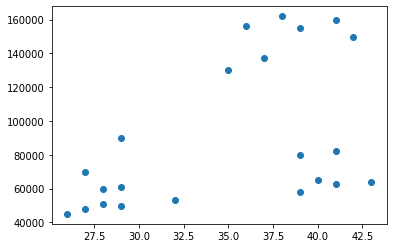

In [9]:
plt.scatter(df['Age'],df['Income($)'])

In [10]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
km.fit(df0)
pred = km.predict(df0)

In [12]:
df0['cluster'] = pred

In [13]:
df0[:20]

,Age,Income($),cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1
5,0.764706,0.940171,1
6,0.882353,0.982906,1
7,0.705882,1.000000,1
8,0.588235,0.948718,1
9,0.529412,0.726496,1


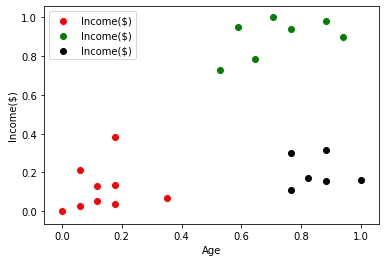

In [14]:
df1 = df0[df0.cluster==0]
df2 = df0[df0.cluster==1]
df3 = df0[df0.cluster==2]

plt.scatter(df1['Age'],df1['Income($)'],color='red',label='Income($)')
plt.scatter(df2['Age'],df2['Income($)'],color='green',label='Income($)')
plt.scatter(df3['Age'],df3['Income($)'],color='black',label='Income($)')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()


In [15]:
centroid = km.cluster_centers_
centroid

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

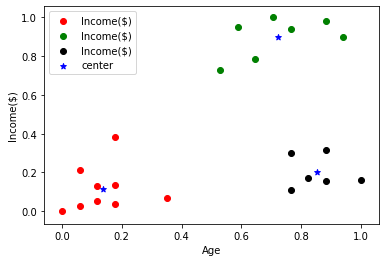

In [16]:
df1 = df0[df0.cluster==0]
df2 = df0[df0.cluster==1]
df3 = df0[df0.cluster==2]

plt.scatter(df1['Age'],df1['Income($)'],color='red',label='Income($)')
plt.scatter(df2['Age'],df2['Income($)'],color='green',label='Income($)')
plt.scatter(df3['Age'],df3['Income($)'],color='black',label='Income($)')
plt.scatter(centroid[:,0],centroid[:,1],color='blue',marker='*',label='center')#[:,0] means all rows and first column and [:,1]means all rows and second column

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [17]:
#Now let choose K value using elbow method
k = []
for i in range(1,10):
    km = KMeans(n_clusters=i)
    km.fit(df0[['Age','Income($)']])
    k.append(km.inertia_)#inertia_ use to calculate sum of square error

Text(0, 0.5, 'Sum of squared erro')

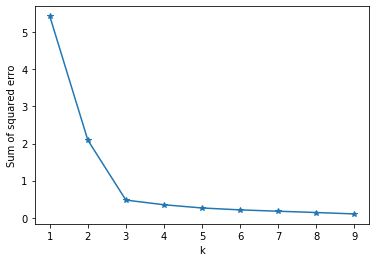

In [59]:
plt.plot(range(1,10),k,marker='*')
plt.xlabel('k')
plt.ylabel('Sum of squared erro')

### As we see k=3 is the best to choose 

In [25]:
df0.drop('cluster',axis=1)

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436
5,0.764706,0.940171
6,0.882353,0.982906
7,0.705882,1.000000
8,0.588235,0.948718
9,0.529412,0.726496


In [28]:
#let take K=6
model = KMeans(n_clusters=6)
model.fit(df0)
pred = model.predict(df0)

In [29]:
df0['cluster']=pred

In [31]:
df0.head(10)

,Age,Income($),cluster
0,0.058824,0.213675,3
1,0.176471,0.384615,0
2,0.176471,0.136752,3
3,0.117647,0.128205,3
4,0.941176,0.897436,1
5,0.764706,0.940171,1
6,0.882353,0.982906,1
7,0.705882,1.000000,1
8,0.588235,0.948718,4
9,0.529412,0.726496,4


In [32]:
df4=df0[df0.cluster==0]
df5=df0[df0.cluster==1]
df6=df0[df0.cluster==2]
df7=df0[df0.cluster==3]
df8=df0[df0.cluster==4]
df9=df0[df0.cluster==5]

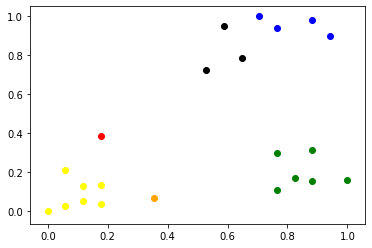

In [42]:
plt.scatter(df4['Age'],df4['Income($)'],color='red',label='Income($)')
plt.scatter(df5['Age'],df5['Income($)'],color='blue',label='Income($)')
plt.scatter(df6['Age'],df6['Income($)'],color='green',label='Income($)')
plt.scatter(df7['Age'],df7['Income($)'],color='yellow',label='Income($)')
plt.scatter(df8['Age'],df8['Income($)'],color='black',label='Income($)')
plt.scatter(df9['Age'],df9['Income($)'],color='orange',label='Income($)')

In [43]:
center=model.cluster_centers_
center

array([[1.76470588e-01, 3.84615385e-01, 0.00000000e+00],
       [8.23529412e-01, 9.55128205e-01, 1.00000000e+00],
       [8.52941176e-01, 2.02279202e-01, 2.00000000e+00],
       [1.00840336e-01, 8.48595849e-02, 1.11022302e-16],
       [5.88235294e-01, 8.20512821e-01, 1.00000000e+00],
       [3.52941176e-01, 6.83760684e-02, 0.00000000e+00]])

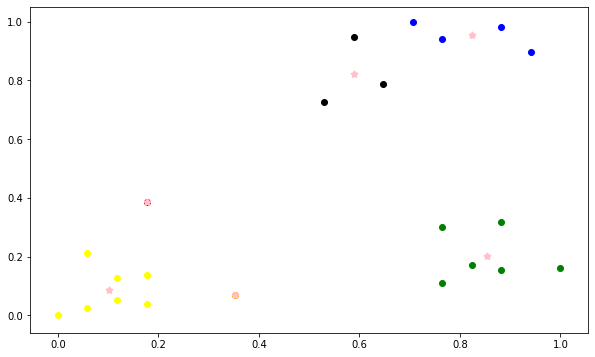

In [56]:
plt.figure(figsize=(10,6))
plt.scatter(df4['Age'],df4['Income($)'],color='red',label='Income($)')
plt.scatter(df5['Age'],df5['Income($)'],color='blue',label='Income($)')
plt.scatter(df6['Age'],df6['Income($)'],color='green',label='Income($)')
plt.scatter(df7['Age'],df7['Income($)'],color='yellow',label='Income($)')
plt.scatter(df8['Age'],df8['Income($)'],color='black',label='Income($)')
plt.scatter(df9['Age'],df9['Income($)'],color='orange',label='Income($)')
plt.scatter(center[:,0],center[:,1],marker='*',color='pink',label='centroid',linewidths=2)